<a href="https://colab.research.google.com/github/sametkusdemir/SmartFarm_YieldPrediction/blob/main/notebooks/1_EDA_Problem_Tanimi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import os

# Drive yolu (Kendi klasör ismine göre burayı düzenle)
# Genelde yol şöyledir: /content/drive/MyDrive/KLASÖR_ADIN/data/yield_df.csv
file_path = '/content/drive/MyDrive/SmartFarm_Project/data/yield_df.csv'

if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    print("✅ Veri Colab'e başarıyla çekildi!")
    display(df.head())
else:
    print("❌ Dosya bulunamadı. Dosya yolunu kontrol et!")

✅ Veri Colab'e başarıyla çekildi!


,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [2]:
df.head()


,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [3]:
# Varsa gereksiz indeks sütununu silelim
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)

# Veri setinin genel özeti
print("--- Veri Seti Bilgileri ---")
df.info()

print("\n--- Eksik Değer Kontrolü ---")
print(df.isnull().sum())

print("\n--- Tekrar Eden Satır Kontrolü ---")
print(f"Tekrar eden satır sayısı: {df.duplicated().sum()}")

--- Veri Seti Bilgileri ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB

--- Eksik Değer Kontrolü ---
Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp              

In [4]:
# İstatistiksel özet
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Year,28242.0,2001.544296,7.051905,1990.00,1995.0000,2001.00,2008.00,2013.00
hg/ha_yield,28242.0,77053.332094,84956.612897,50.00,19919.2500,38295.00,104676.75,501412.00
average_rain_fall_mm_per_year,28242.0,1149.055980,709.812150,51.00,593.0000,1083.00,1668.00,3240.00
pesticides_tonnes,28242.0,37076.909344,59958.784665,0.04,1702.0000,17529.44,48687.88,367778.00
avg_temp,28242.0,20.542627,6.312051,1.30,16.7025,21.51,26.00,30.65


In [5]:
print(f"Toplam Ülke Sayısı: {df['Area'].nunique()}")
print(f"Toplam Ürün Çeşidi: {df['Item'].nunique()}")

print("\n--- En Çok Veri Olan 10 Ülke ---")
print(df['Area'].value_counts().head(10))

print("\n--- Ürün Dağılımı ---")
print(df['Item'].value_counts())

Toplam Ülke Sayısı: 101
Toplam Ürün Çeşidi: 10

--- En Çok Veri Olan 10 Ülke ---
Area
India           4048
Brazil          2277
Mexico          1472
Pakistan        1449
Australia        966
Japan            966
Indonesia        828
South Africa     644
Turkey           625
Ecuador          621
Name: count, dtype: int64

--- Ürün Dağılımı ---
Item
Potatoes                4276
Maize                   4121
Wheat                   3857
Rice, paddy             3388
Soybeans                3223
Sorghum                 3039
Sweet potatoes          2890
Cassava                 2045
Yams                     847
Plantains and others     556
Name: count, dtype: int64


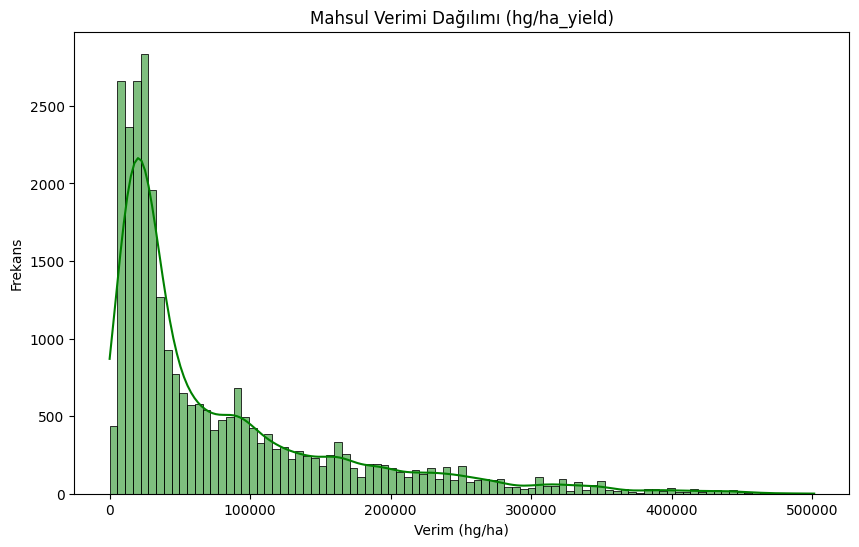

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['hg/ha_yield'], kde=True, color='green')
plt.title('Mahsul Verimi Dağılımı (hg/ha_yield)')
plt.xlabel('Verim (hg/ha)')
plt.ylabel('Frekans')
plt.show()

In [9]:
# Temizlikten önceki boyut
print(f"Temizlik öncesi: {df.shape}")

# Tekrar edenleri sil
df = df.drop_duplicates()

# Temizlik sonrası boyut
print(f"Temizlik sonrası: {df.shape}")

# Son bir kontrol:
print(f"Kalan tekrar eden sayısı: {df.duplicated().sum()}")

Temizlik öncesi: (28242, 7)
Temizlik sonrası: (25932, 7)
Kalan tekrar eden sayısı: 0


In [10]:
import numpy as np

# 1. Yeni Feature: Continent (Kıta)
# FAO veri setindeki yaygın ülkeler için manuel haritalama
country_to_continent = {
    'Albania': 'Europe', 'Algeria': 'Africa', 'Angola': 'Africa', 'Argentina': 'South America',
    'Armenia': 'Asia', 'Australia': 'Oceania', 'Austria': 'Europe', 'Azerbaijan': 'Asia',
    'Bahamas': 'North America', 'Bahrain': 'Asia', 'Bangladesh': 'Asia', 'Belarus': 'Europe',
    'Belgium': 'Europe', 'Botswana': 'Africa', 'Brazil': 'South America', 'Bulgaria': 'Europe',
    'Burkina Faso': 'Africa', 'Burundi': 'Africa', 'Cameroon': 'Africa', 'Canada': 'North America',
    'Central African Republic': 'Africa', 'Chile': 'South America', 'China': 'Asia', 'Colombia': 'South America',
    'Croatia': 'Europe', 'Denmark': 'Europe', 'Dominican Republic': 'North America', 'Ecuador': 'South America',
    'Egypt': 'Africa', 'El Salvador': 'North America', 'Eritrea': 'Africa', 'Estonia': 'Europe',
    'Finland': 'Europe', 'France': 'Europe', 'Germany': 'Europe', 'Ghana': 'Africa', 'Greece': 'Europe',
    'Guatemala': 'North America', 'Guinea': 'Africa', 'Guyana': 'South America', 'Haiti': 'North America',
    'Honduras': 'North America', 'Hungary': 'Europe', 'India': 'Asia', 'Indonesia': 'Asia', 'Iraq': 'Asia',
    'Ireland': 'Europe', 'Italy': 'Europe', 'Jamaica': 'North America', 'Japan': 'Asia', 'Kazakhstan': 'Asia',
    'Kenya': 'Africa', 'Latvia': 'Europe', 'Lebanon': 'Asia', 'Lesotho': 'Africa', 'Libya': 'Africa',
    'Lithuania': 'Europe', 'Madagascar': 'Africa', 'Malawi': 'Africa', 'Malaysia': 'Asia', 'Mali': 'Africa',
    'Mauritania': 'Africa', 'Mauritius': 'Africa', 'Mexico': 'North America', 'Montenegro': 'Europe',
    'Morocco': 'Africa', 'Mozambique': 'Africa', 'Namibia': 'Africa', 'Nepal': 'Asia', 'Netherlands': 'Europe',
    'New Zealand': 'Oceania', 'Nicaragua': 'North America', 'Niger': 'Africa', 'Norway': 'Europe',
    'Pakistan': 'Asia', 'Papua New Guinea': 'Oceania', 'Peru': 'South America', 'Poland': 'Europe',
    'Portugal': 'Europe', 'Qatar': 'Asia', 'Romania': 'Europe', 'Rwanda': 'Africa', 'Saudi Arabia': 'Asia',
    'Senegal': 'Africa', 'Slovenia': 'Europe', 'South Africa': 'Africa', 'Spain': 'Europe', 'Sri Lanka': 'Asia',
    'Sudan': 'Africa', 'Suriname': 'South America', 'Sweden': 'Europe', 'Switzerland': 'Europe',
    'Tajikistan': 'Asia', 'Thailand': 'Asia', 'Tunisia': 'Africa', 'Turkey': 'Asia', 'Uganda': 'Africa',
    'Ukraine': 'Europe', 'United Kingdom': 'Europe', 'Uruguay': 'South America', 'Zambia': 'Africa',
    'Zimbabwe': 'Africa'
}

# Eşleşmeyenler için 'Other' atayalım
df['Continent'] = df['Area'].map(country_to_continent).fillna('Other')

# 2. Yeni Feature: Rain_Temp_Ratio (Yağış / Sıcaklık Dengesi)
# Sıfıra bölünme hatasını önlemek için +1 ekleyebiliriz ama sıcaklık genelde 0 değil bu veride.
df['Rain_Temp_Ratio'] = df['average_rain_fall_mm_per_year'] / df['avg_temp']

# 3. Yeni Feature: Sıcaklık Kategorisi (Bitkiler için önemli)
# <15: Cool, 15-25: Mild, >25: Hot
def categorize_temp(temp):
    if temp < 15: return 'Cool'
    elif temp <= 25: return 'Mild'
    else: return 'Hot'

df['Temp_Category'] = df['avg_temp'].apply(categorize_temp)

print("Feature Engineering Tamamlandı!")
print(f"Yeni Sütun Sayısı: {df.shape[1]}")
display(df.head())

Feature Engineering Tamamlandı!
Yeni Sütun Sayısı: 10


,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Continent,Rain_Temp_Ratio,Temp_Category
0,Albania,Maize,1990,36613,1485.0,121.0,16.37,Europe,90.714722,Mild
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37,Europe,90.714722,Mild
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37,Europe,90.714722,Mild
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37,Europe,90.714722,Mild
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37,Europe,90.714722,Mild


In [11]:
# Kayıt yolu
save_path = '/content/drive/MyDrive/SmartFarm_Project/data/cleaned_data.csv'

# index=False önemli, gereksiz indeks sütunu oluşmasın
df.to_csv(save_path, index=False)

print(f"✅ Temiz veri kaydedildi: {save_path}")

✅ Temiz veri kaydedildi: /content/drive/MyDrive/SmartFarm_Project/data/cleaned_data.csv
